0.01000070571899414


Text(0.5, 0, 'sepal length (cm)')

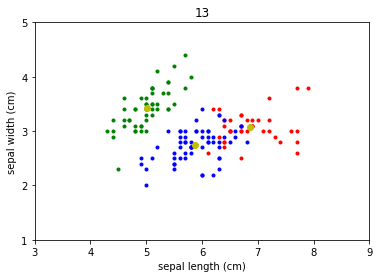

In [5]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import random
from sklearn import datasets
iris = datasets.load_iris() 
from scipy.spatial import distance

def KMeans(data,numofcl,maxiter):
    (N,M) = data.shape   
    p_of_cl = data[random.sample(range(N),numofcl)] ## generating first clusters
    iteration = 0
    dists = []
    old_mins =[]
    mins = []
    
    def calculate_dist():
        dists = -2 * np.dot(data, p_of_cl.T) + np.array(np.sum(p_of_cl ** 2, axis=1))
        return dists
    
    def calculate_clusters():
        mins = np.argmin(dists,axis=1)
        return mins
    
    def new_centroids():
        center_of_mass = np.zeros(numofcl*M).reshape(numofcl,M) ## new centroids
        for i in range(numofcl):
            center_of_mass[i] = np.mean(data[mins==i],axis=0)
        return center_of_mass
    
    while(iteration < maxiter ):
        iteration +=1
        dists = calculate_dist()
        old_mins=mins
        mins=calculate_clusters()
        old_cl = p_of_cl
        p_of_cl = new_centroids()
        
        if(np.array_equal(old_cl,p_of_cl)):
            break
        if(np.array_equal(mins,old_mins)):
            break
    
    
    
  
    return data,p_of_cl,iteration,mins  




czas = time.time()
data,p_of_cl,iteration,mins = KMeans(iris.data,3,1000)
print(time.time()-czas)

plt.plot(data[:,0][mins==0],data[:,1][mins==0],'r.')
plt.plot(data[:,0][mins==1],data[:,1][mins==1],'g.')
plt.plot(data[:,0][mins==2],data[:,1][mins==2],'b.')
plt.plot(p_of_cl[:,0],p_of_cl[:,1],'yo')
plt.xlim(3,9)
plt.ylim(1,5)
plt.yticks(np.arange(1,6,1))
plt.title(iteration)
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')


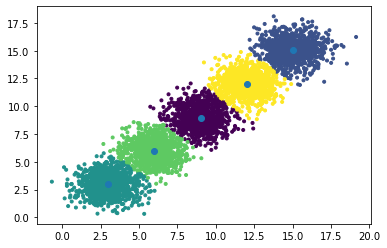

In [3]:

def sample_from_mixture(d,K,p,uk,cov,N):
    K = np.arange(K)
    Z = np.random.randn(N,d)
    
    A = np.linalg.cholesky(cov)

    for i in range(N):
        choose_dist = np.random.choice(K,1,False,p)
        [choose_dist] = choose_dist
    
        
        Z[i,:] =uk[choose_dist,:] + np.dot(A[choose_dist,:,:],Z[i,:])
        
    
    return Z

# A :

Sigma = np.array([np.eye(2)] * 5)
    
ukA = np.array([[1,1]] * 5)
for i in range(5):
    ukA[i] = ukA[i] * 3*(i+1)





Z = sample_from_mixture(2,5,[0.2,0.2,0.2,0.2,0.2],ukA,Sigma,5000)

data,p_of_cl,iteration,mins = KMeans(Z,5,100)

def draw(data,mins,p_of_cl):
    X = data[:,0]
    Y = data[:,1]
    plt.scatter(X,Y,c=mins,marker='.')
    plt.scatter(p_of_cl[:,0],p_of_cl[:,1])
    


draw(data,mins,p_of_cl)



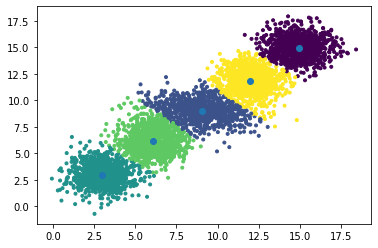

In [37]:
#B
Sigma[2] = [[3,0],[0,1]]

Z = sample_from_mixture(2,5,[0.2,0.2,0.2,0.2,0.2],ukA,Sigma,5000)
data,p_of_cl,iteration,mins = KMeans(Z,5,100)
draw(data,mins,p_of_cl)



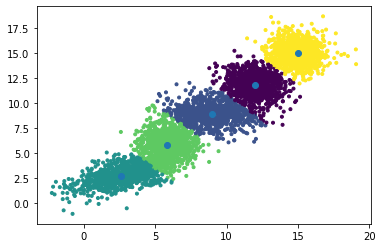

In [38]:
#C
Sigma[0] = [[3,1], [1,1]]

Z = sample_from_mixture(2,5,[0.2,0.2,0.2,0.2,0.2],ukA,Sigma,5000)
data,p_of_cl,iteration,mins = KMeans(Z,5,100)
draw(data,mins,p_of_cl)




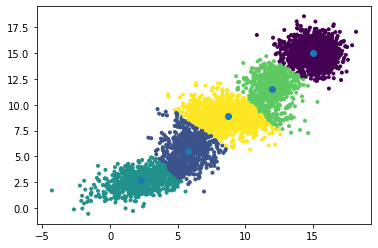

In [39]:
#D

Z = sample_from_mixture(2,5,[0.2,0.1,0.3,0.1,0.3],ukA,Sigma,5000)
data,p_of_cl,iteration,mins = KMeans(Z,5,100)
draw(data,mins,p_of_cl)


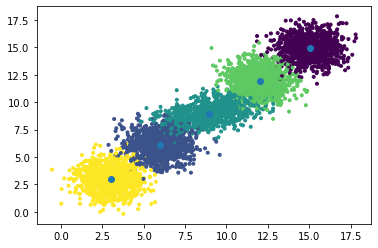

In [40]:
#E
Sigma = np.array([np.eye(3)] * 5)
    
ukA = np.array([[1,1,1]] * 5)
for i in range(5):
    ukA[i] = ukA[i] * 3*(i+1)



Sigma[2] = [[3,1,0],[1,1,0],[0,0,1]]






Z = sample_from_mixture(3,5,[0.2,0.2,0.2,0.2,0.2],ukA,Sigma,5000)
data,p_of_cl,iteration,mins = KMeans(Z,5,100)
draw(data,mins,p_of_cl)


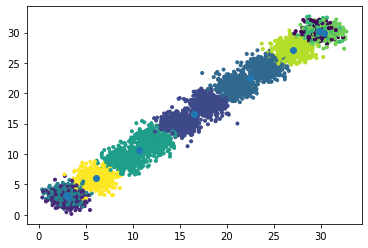

In [41]:
#F
Sigma = np.array([np.eye(100)] * 10)
ukF = np.array([np.ones(100)] * 10)
for i in range(10):
    ukF[i] = ukF[i] * 3 * (i+1)
    
    
p = np.ones(10)/10

Z= sample_from_mixture(100,10,p,ukF,Sigma,5000)
data,p_of_cl,iteration,mins = KMeans(Z,10,100)
draw(data,mins,p_of_cl)

# Task_2

In [33]:
# (d,K,p,uk,cov,N):
d = 100
K = 1000
N = 1000000
p = np.ones(K) / K
q = 10
uk_2 = np.array([np.ones(d)] * K)
for i in range(K):
    uk_2[i] = uk_2[i] * (i+1) * q

Sigma = np.array([np.eye(d)] * K)
print(uk_2)

[[   10.    10.    10. ...    10.    10.    10.]
 [   20.    20.    20. ...    20.    20.    20.]
 [   30.    30.    30. ...    30.    30.    30.]
 ...
 [ 9980.  9980.  9980. ...  9980.  9980.  9980.]
 [ 9990.  9990.  9990. ...  9990.  9990.  9990.]
 [10000. 10000. 10000. ... 10000. 10000. 10000.]]


In [34]:
Z= sample_from_mixture(d,K,p,uk_2,Sigma,N)


In [35]:
data,p_of_cl,iteration,mins = KMeans(Z,10,100)

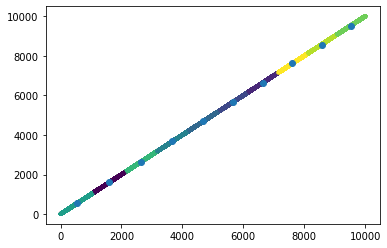

In [36]:
draw(data,mins,p_of_cl)

# Task 3
# Wines

In [37]:
import pandas as pd


In [67]:
iris = datasets.load_iris() 
iris_df = pd.DataFrame(iris.data)

iris_df.set_index(iris.target_names[iris.target])


,0,1,2,3
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0
virginica,6.2,3.4,5.4,2.3
